In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


The above dataset of this particular problem. I have to predict whether the loan will be approved or not so loan status is my target columns and the data type is categorical. It is called classification problem.

# Preprocessing and EDA:


In [4]:
# print the shape of dataset
df.shape

(614, 13)

we have 614 rows and 13 column in dataset

In [5]:
# checking for null value
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


As we see we have null value in dataset so we have to fill those null value

In [7]:
# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [8]:
# Lets checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [9]:
# Checking the values counts of each columns
for a in df.columns:
    print(df[a].value_counts())
    print('########################################')

LP001998    1
LP001677    1
LP001205    1
LP002517    1
LP001630    1
           ..
LP002600    1
LP002301    1
LP001334    1
LP001267    1
LP001657    1
Name: Loan_ID, Length: 614, dtype: int64
########################################
Male      489
Female    112
Name: Gender, dtype: int64
########################################
Yes    398
No     213
Name: Married, dtype: int64
########################################
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
########################################
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
########################################
No     500
Yes     82
Name: Self_Employed, dtype: int64
########################################
2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64
########################################
0.0       273
2500.0      5
2083.0      5
1666.0      5
1

 we can drop the Loan_ID column because there is no use of this column inprediction

In [10]:
df= df.drop('Loan_ID',axis=1)

<AxesSubplot:>

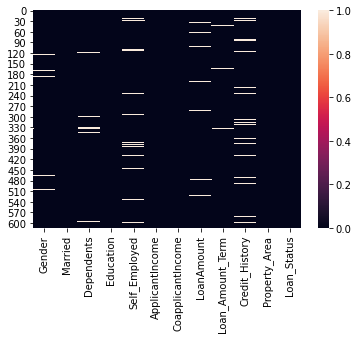

In [11]:
#lets check the null value by heatmap
sns.heatmap(df.isnull())

In [15]:
# fill the null values 
# replacing numerical column with median
df["LoanAmounnt"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

In [16]:
# Replacing null values in categorical columns
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Dependents"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Self_Employed"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [17]:
# check the null value again
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmounnt          0
dtype: int64

In [18]:
df.isnull().values.any()

False

We have now filled all NAN

<AxesSubplot:>

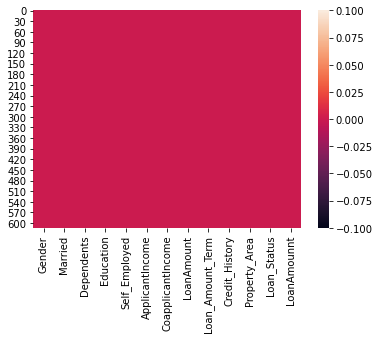

In [20]:
#let's check again visualize the null values 
sns.heatmap(df.isnull())

now as we see there is no null value in our dataset now

In [21]:
# lets check count for our target column
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

we see we have 2 category y means loan approved and N means not approved

In [22]:
# print description of dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmounnt
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049,145.465798
std,6109.041673,2926.248369,84.180967,64.428629,0.352339,84.180967
min,150.000000,0.000000,9.000000,12.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,100.250000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000,125.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,164.750000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,700.000000


## Data Visualization

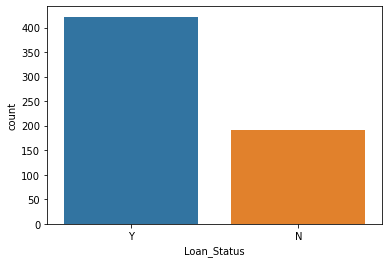

In [23]:
sns.countplot(df["Loan_Status"])
plt.show()

Y    422 approved
N    192 not approved

Male      502
Female    112
Name: Gender, dtype: int64


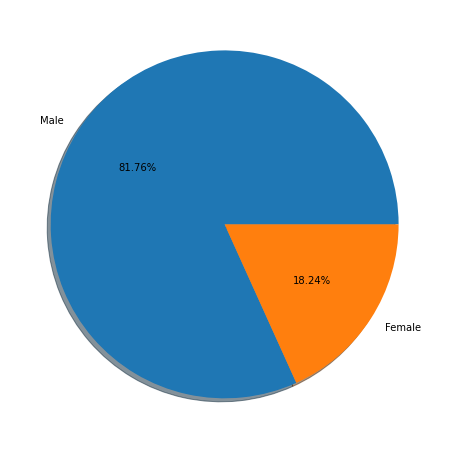

In [24]:
print(df["Gender"].value_counts())
labels='Male','Female'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

male are applying more for loan

0     345
1     102
2     101
3+     51
No     15
Name: Dependents, dtype: int64


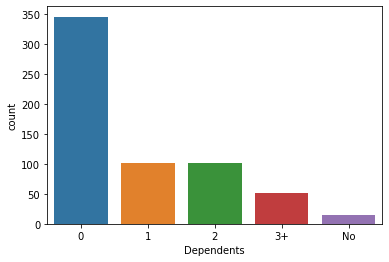

In [25]:
# Visualizing the count of Dependents 
print(df["Dependents"].value_counts())
sns.countplot(df["Dependents"])
plt.show()

The applicants who have 0 dependents have high counts and the applicants having more than 3 dependents counts are very less.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


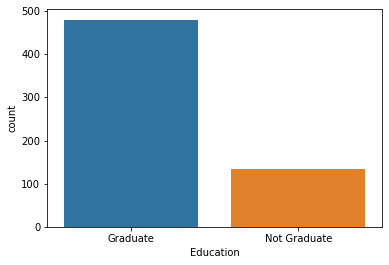

In [27]:
# Visualizing the count of Education of the applicants
print(df["Education"].value_counts())
sns.countplot(df["Education"])
plt.show()

The count of Graduate applicants is high

No     532
Yes     82
Name: Self_Employed, dtype: int64


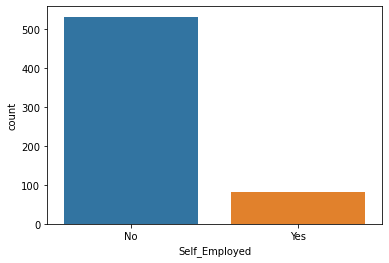

In [29]:
# Visualizing the count of Self_Employed applicants
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"])
plt.show()

Most of the applicants or not self employed

1.0    525
0.0     89
Name: Credit_History, dtype: int64


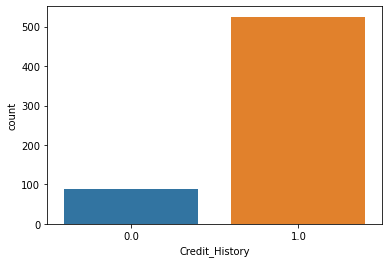

In [30]:
# Visualizing the count of Credit_History of the applicants
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"])
plt.show()

Most of the applicants who have credit history 1 are high in numbers.

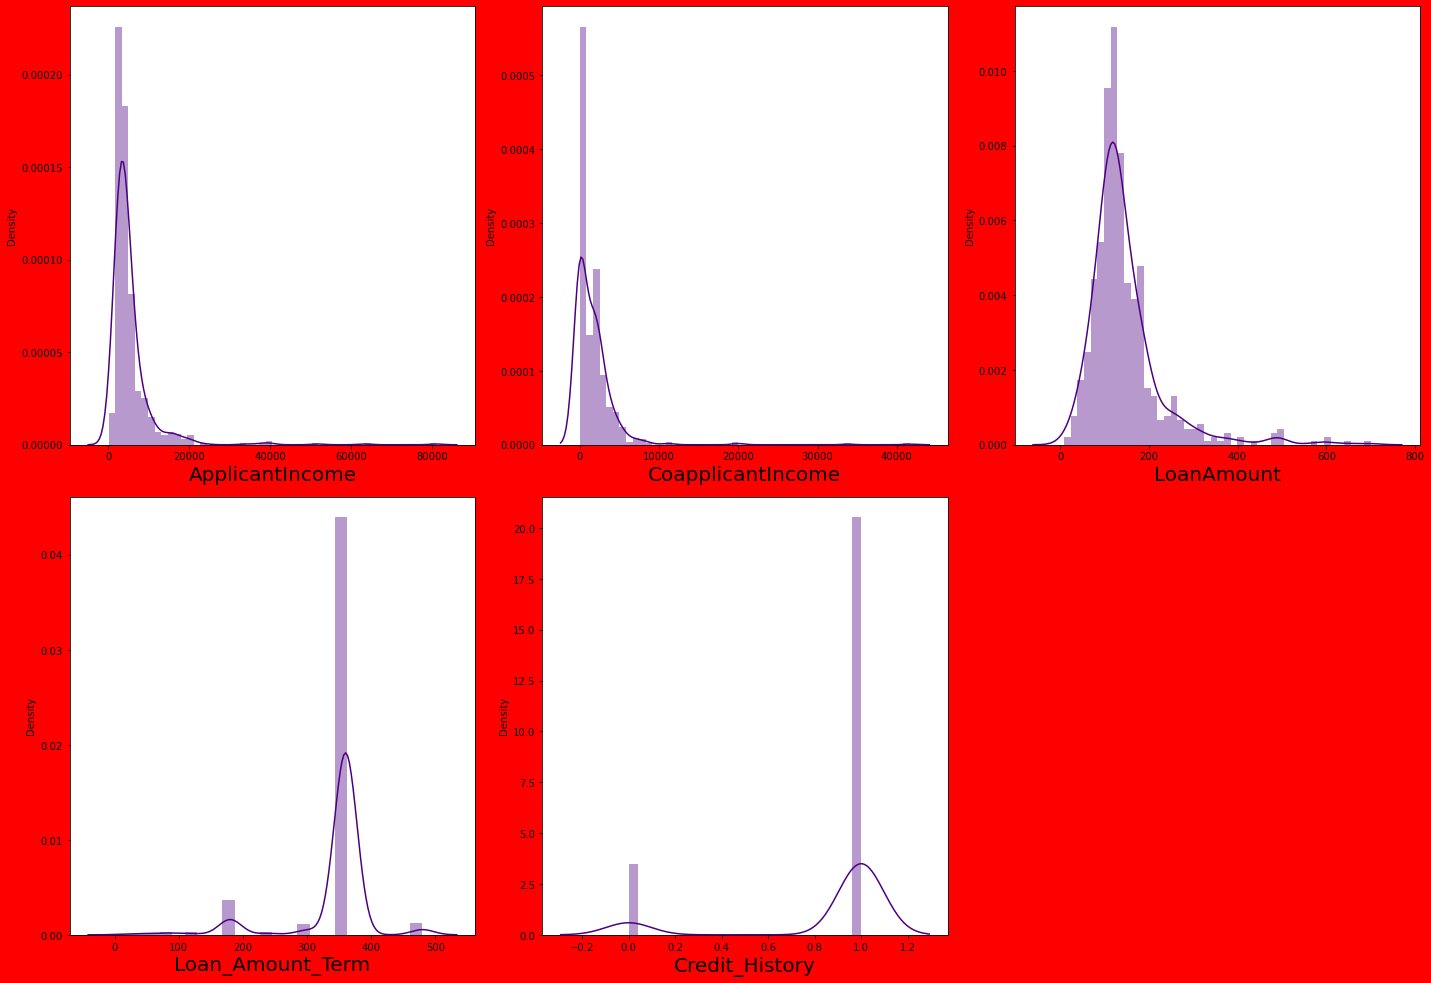

In [33]:
# check distribution of data
plt.figure(figsize=(20,20),facecolor='red')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="indigo")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

data is not not normaly distributed, so we have to remove skewness also

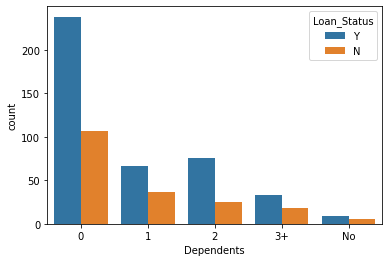

In [34]:
#Visualizing count of Dependents of the applicants on the basis of loan status
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()

applicants who have dependents 0 are more likely to get their loan approved

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


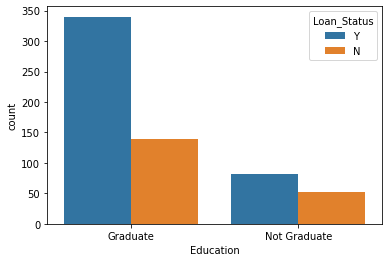

In [35]:
#Visualizing count of Education of the applicants
print(df["Education"].value_counts())
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()

applicants who are graduate more likely to get their loan approved

No     532
Yes     82
Name: Self_Employed, dtype: int64


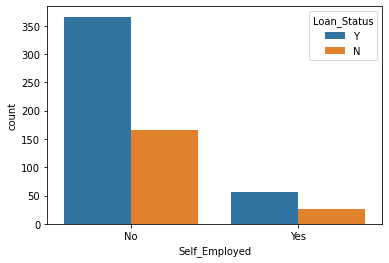

In [36]:
#Visualizing whether the applicants are Self_Employed or not 
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"],hue=df["Loan_Status"])
plt.show()

The applicants who are not self employed have the tendancy of getting their loans than self employed applicants.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


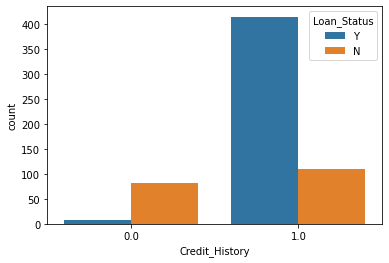

In [37]:
#Visualizing the count of the Credit_History of the applicants
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"], hue=df["Loan_Status"])
plt.show()

The applicants who have credit history 1 have got their loan approval which means they have cleared their past loans.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


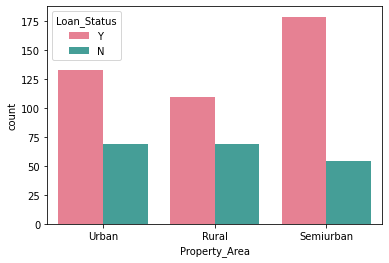

In [38]:
#Visualizing Property_Area of the applicants
print(df["Property_Area"].value_counts())
sns.countplot(df["Property_Area"],hue=df["Loan_Status"],palette="husl")
plt.show()

Most of the applicants from the Semiurban are applying for loan followed by Urban area. Also they have more chance of getting their loan approval.

Male      502
Female    112
Name: Gender, dtype: int64


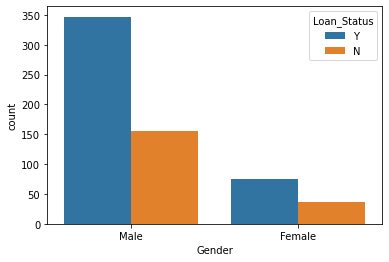

In [39]:
#Visualizing Gender of the applicants
print(df["Gender"].value_counts())
sns.countplot(df["Gender"],hue=df["Loan_Status"])
plt.show()

The male applicants who have applied for the loan have got approved compared to the female applicants.

Yes    398
No     213
0        3
Name: Married, dtype: int64


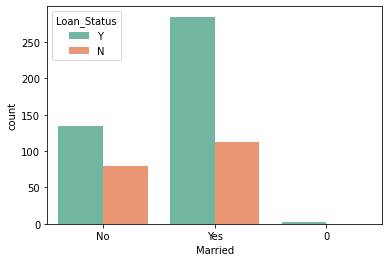

In [41]:
#Visualizing Married status of the applicants
print(df["Married"].value_counts())
sns.countplot(df["Married"],hue=df["Loan_Status"],palette="Set2")
plt.show()


more Male applicant loans got approved compared to Female.

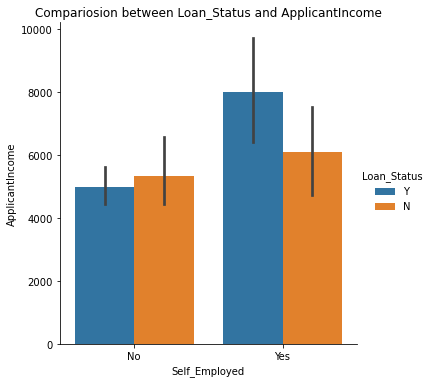

In [42]:
# Cheking relation between Self_Employed and ApplicantIncome
sns.catplot(x='Self_Employed',y="ApplicantIncome",data=df,kind="bar",hue='Loan_Status')
plt.title("Compariosion between Loan_Status and ApplicantIncome")
plt.show()

The applicants whose loan got approved have average income and have their own bussiness means they are self employed

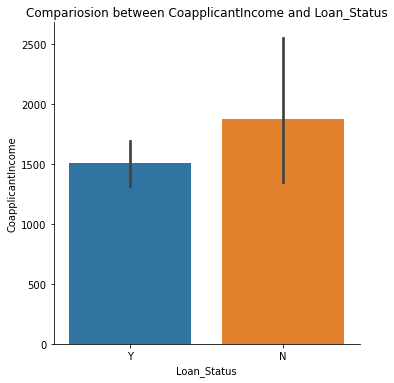

In [43]:
# Checking relation between Loan_Status and CoapplicantIncome
sns.catplot(x='Loan_Status',y="CoapplicantIncome",data=df,kind="bar")
plt.title("Compariosion between CoapplicantIncome and Loan_Status")
plt.show()

The coapplicants who got loan have average income

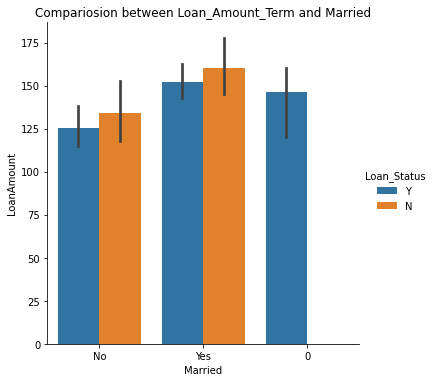

In [44]:
# Checking relation between LoanAmount and Married on the basis of target
sns.catplot(x="Married",y='LoanAmount',data=df,kind="bar",hue="Loan_Status")
plt.title("Compariosion between Loan_Amount_Term and Married")
plt.show()


The applicants who got married and have average loan amount have more tendency to getting loan

## Identifying the outliers

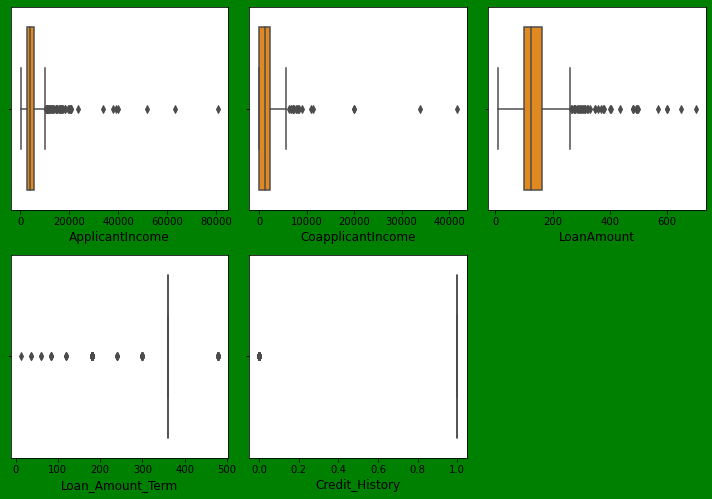

In [45]:
plt.figure(figsize=(10,10),facecolor='green')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [46]:
#now remove the outliers by Z score method
# numerical columns containing outliers
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]

# Using Zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

array([[0.07299082, 0.55448733, 0.30275919, 0.2732313 ],
       [0.13441195, 0.03873155, 0.20764834, 0.2732313 ],
       [0.39374734, 0.55448733, 0.94475737, 0.2732313 ],
       ...,
       [0.43717437, 0.47240418, 1.27845856, 0.2732313 ],
       [0.35706382, 0.55448733, 0.49379411, 0.2732313 ],
       [0.13441195, 0.55448733, 0.14820407, 0.2732313 ]])

In [47]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmounnt
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,120.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,128.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,66.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,120.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,71.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,40.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,253.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,187.0


In [49]:
#check the shape of original data and after removing outlier
df.shape

(614, 13)

In [50]:
new_df.shape

(577, 13)

In [51]:
# Checking the the data loss
data_loss = (614-577)/614*100
data_loss


6.026058631921824

### Checking for skewness

In [53]:
new_df.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.163426
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
LoanAmounnt          1.163426
dtype: float64

###### Removing Skewness using yeo-johnson method

In [54]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [55]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,-0.145633
1,0.234783,0.744117,0.008621
2,-0.527201,-1.122446,-1.432788
3,-0.791972,0.895786,-0.145633
4,0.728848,-1.122446,0.245833


In [56]:
#lets check skewness again
new_df.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047768
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
LoanAmounnt          1.163426
dtype: float64

now skewness has also been removed

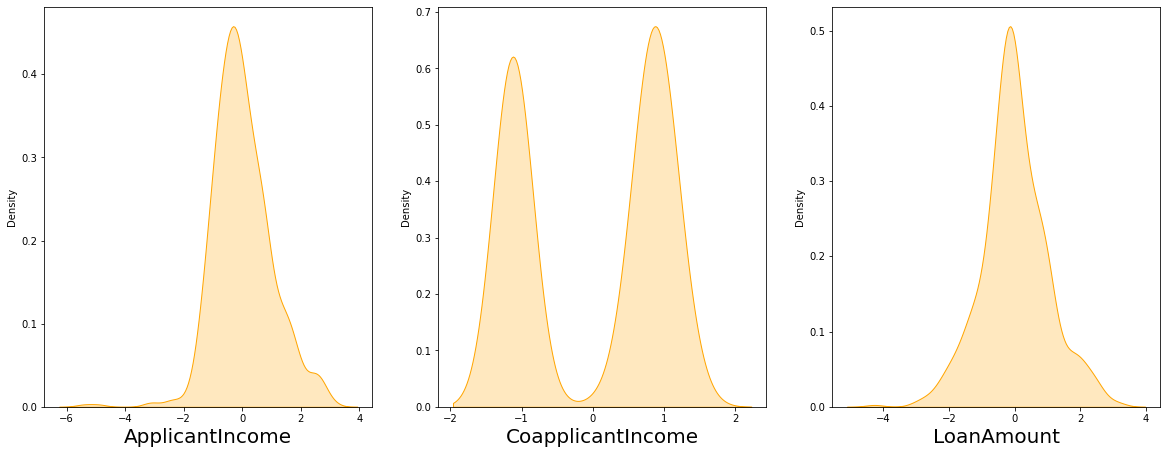

In [58]:
# check the data distribution after removing skewness
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='orange',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Almost data is no normally distributed

# Label Encoding

In [59]:
categorical_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [60]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [61]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmounnt
0,1,1,0,0,0,0.681780,-1.122446,-0.145633,360.0,1.0,2,1,120.0
1,1,2,1,0,0,0.234783,0.744117,0.008621,360.0,1.0,0,0,128.0
2,1,2,0,0,1,-0.527201,-1.122446,-1.432788,360.0,1.0,2,1,66.0
3,1,2,0,1,0,-0.791972,0.895786,-0.145633,360.0,1.0,2,1,120.0
4,1,1,0,0,0,0.728848,-1.122446,0.245833,360.0,1.0,2,1,141.0


Now we have converted categorical column into numerical

In [62]:
new_df.shape

(577, 13)

<AxesSubplot:>

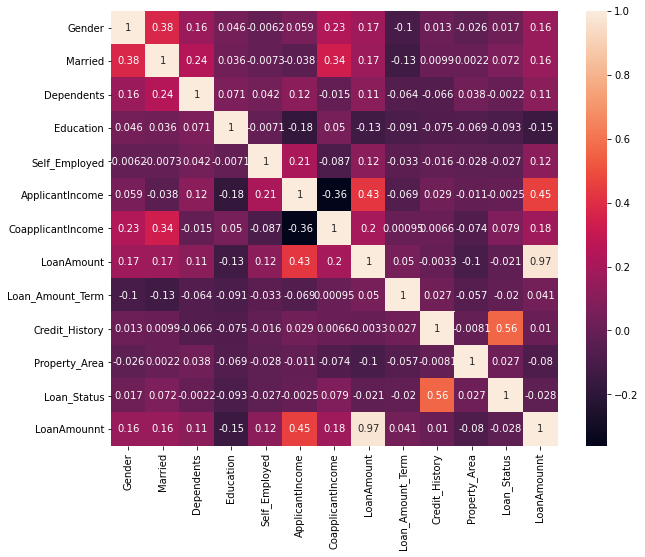

In [63]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(), annot = True)

The target column Loan_Status is highly positively correlated with the feature Credit_History.

The other features have very less correlation with the target column.

Also we can notice there is no multicollinearity issue in the features. Features have moderate level of correlation with each other.

ApplicantIncome and Gender is very less correlated with the target.

# Separating the features and label variables into x and y

In [64]:
x = new_df.drop("Loan_Status", axis=1)
y = new_df["Loan_Status"]

In [65]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmounnt
0,1,1,0,0,0,0.681780,-1.122446,-0.145633,360.0,1.0,2,120.0
1,1,2,1,0,0,0.234783,0.744117,0.008621,360.0,1.0,0,128.0
2,1,2,0,0,1,-0.527201,-1.122446,-1.432788,360.0,1.0,2,66.0
3,1,2,0,1,0,-0.791972,0.895786,-0.145633,360.0,1.0,2,120.0
4,1,1,0,0,0,0.728848,-1.122446,0.245833,360.0,1.0,2,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,0,0,0,-0.587375,-1.122446,-1.288499,360.0,1.0,0,71.0
610,1,2,3,0,0,0.035386,-1.122446,-2.335137,180.0,1.0,0,40.0
611,1,2,1,0,0,1.281658,0.173344,1.845431,360.0,1.0,2,253.0
612,1,2,2,0,0,1.164426,-1.122446,0.981439,360.0,1.0,2,187.0


In [66]:
x.shape

(577, 12)

In [67]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [68]:
y.shape

(577,)

#### Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmounnt
0,0.477137,-1.302871,-0.737994,-0.541961,-0.380580,0.681780,-1.122446,-0.145633,0.230853,0.418513,1.227472,-0.267707
1,0.477137,0.734409,0.158475,-0.541961,-0.380580,0.234783,0.744117,0.008621,0.230853,0.418513,-1.306522,-0.125325
2,0.477137,0.734409,-0.737994,-0.541961,2.627567,-0.527201,-1.122446,-1.432788,0.230853,0.418513,1.227472,-1.228788
3,0.477137,0.734409,-0.737994,1.845150,-0.380580,-0.791972,0.895786,-0.145633,0.230853,0.418513,1.227472,-0.267707
4,0.477137,-1.302871,-0.737994,-0.541961,-0.380580,0.728848,-1.122446,0.245833,0.230853,0.418513,1.227472,0.106046
...,...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.302871,-0.737994,-0.541961,-0.380580,-0.587375,-1.122446,-1.288499,0.230853,0.418513,-1.306522,-1.139799
573,0.477137,0.734409,1.951412,-0.541961,-0.380580,0.035386,-1.122446,-2.335137,-3.243986,0.418513,-1.306522,-1.691530
574,0.477137,0.734409,0.158475,-0.541961,-0.380580,1.281658,0.173344,1.845431,0.230853,0.418513,1.227472,2.099399
575,0.477137,0.734409,1.054943,-0.541961,-0.380580,1.164426,-1.122446,0.981439,0.230853,0.418513,1.227472,0.924745


In [70]:
#Checking the value count of target column
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

data is imbalanced so we oversampling for this

In [71]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [72]:
# check the value again for target column
y.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

now data imbalance issue is solved

# Creating train_test split

In [75]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=80)

In [76]:
#Classification Algorithms:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

### 1)Decision Tree Classifier

In [77]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7782426778242678
[[99 27]
 [26 87]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       126
           1       0.76      0.77      0.77       113

    accuracy                           0.78       239
   macro avg       0.78      0.78      0.78       239
weighted avg       0.78      0.78      0.78       239



The accuracy using Decision Tree Classifier is 77.82%

### 2)Random Forest Classifier

In [78]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.803347280334728
[[95 31]
 [16 97]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       126
           1       0.76      0.86      0.80       113

    accuracy                           0.80       239
   macro avg       0.81      0.81      0.80       239
weighted avg       0.81      0.80      0.80       239



The accuracy using Random Forest Classifier is 80.33%

### 3)Logistic Regression

In [79]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7071129707112971
[[ 65  61]
 [  9 104]]
              precision    recall  f1-score   support

           0       0.88      0.52      0.65       126
           1       0.63      0.92      0.75       113

    accuracy                           0.71       239
   macro avg       0.75      0.72      0.70       239
weighted avg       0.76      0.71      0.70       239



The accuracy using Logistic Regression is 70.71

### 4)Support Vector Machine Classifier

In [80]:
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7154811715481172
[[ 71  55]
 [ 13 100]]
              precision    recall  f1-score   support

           0       0.85      0.56      0.68       126
           1       0.65      0.88      0.75       113

    accuracy                           0.72       239
   macro avg       0.75      0.72      0.71       239
weighted avg       0.75      0.72      0.71       239



The accuracy using SVC is 71.54%

### 5)KNeighbors Classifier

In [81]:
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.7280334728033473
[[93 33]
 [32 81]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       126
           1       0.71      0.72      0.71       113

    accuracy                           0.73       239
   macro avg       0.73      0.73      0.73       239
weighted avg       0.73      0.73      0.73       239



The accuracy using KNeighbors Classifier is 72.80%

### 6)Gradient Boosting Classifier

In [82]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.7949790794979079
[[91 35]
 [14 99]]
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       126
           1       0.74      0.88      0.80       113

    accuracy                           0.79       239
   macro avg       0.80      0.80      0.79       239
weighted avg       0.81      0.79      0.79       239



The accuracy using Gradient Boosting Classifier is 79.49%

## Checking the Cross Validation Score

In [84]:
# cv score for Decision Tree Classifier
from sklearn.model_selection import cross_val_score
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7977908805031447


In [85]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8355345911949688


In [86]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.721124213836478


In [87]:
# cv score for Support Vector Machine Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.7261635220125785


In [88]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.7512735849056603


In [89]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.7953301886792452


I am choosing gradient boosting classifier as best model lets try to increse accuracy by hyperparameter tuning

In [100]:
from sklearn.model_selection import GridSearchCV

In [110]:
GB2= GradientBoostingClassifier()
parameters = {'criterion':['mse', 'mae'],
              'learning_rate': [0.1,0,2,0.5],
              'n_estimators': [100,200,300,400,500]
             }
Finalmod = GridSearchCV(GB2, parameters)
Finalmod.fit(x_train, y_train)
print(Finalmod.best_params_)

{'criterion': 'mse', 'learning_rate': 0.1, 'n_estimators': 200}


In [111]:
Final_model = GradientBoostingClassifier(criterion='mse',learning_rate=0.1, n_estimators=200)
Final_model.fit(x_train,y_train)

# Prediction
predF = Final_model.predict(x_test)

print(accuracy_score(y_test, predF))
print(confusion_matrix(y_test, predF))
print(classification_report(y_test,predF))

0.7447698744769874
[[89 37]
 [24 89]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.74       126
           1       0.71      0.79      0.74       113

    accuracy                           0.74       239
   macro avg       0.75      0.75      0.74       239
weighted avg       0.75      0.74      0.74       239



Accracy with default parameter is good s o we can go with GB model

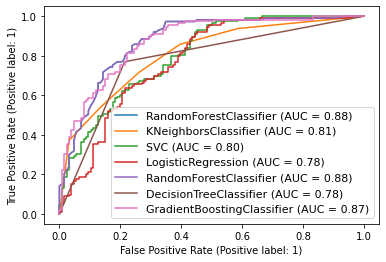

In [117]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(RFC,x_test,y_test)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Saving the model

In [118]:
import pickle

In [119]:
filename= 'Loan_status_project'
pickle.dump(GB, open(filename,'wb'))